In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
    'StudentID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Avg_Study_Hours': [2, 5, 1, 6, 3, 2, 7, 5],
    'Attendance_%': [60, 85, 45, 90, 70, 50, 95, 80],
    'Assignments_Completed': [3, 9, 1, 10, 6, 2, 11, 8],
    'ClusterID': [2, 1, 2, 0, 1, 2, 0, 1]
}

df = pd.DataFrame(data)
df


,StudentID,Avg_Study_Hours,Attendance_%,Assignments_Completed,ClusterID
0,101,2,60,3,2
1,102,5,85,9,1
2,103,1,45,1,2
3,104,6,90,10,0
4,105,3,70,6,1
5,106,2,50,2,2
6,107,7,95,11,0
7,108,5,80,8,1


In [23]:
print("Cluster Distribution:\n", df['ClusterID'].value_counts())
cluster_summary = df.groupby('ClusterID').mean().round(2)
cluster_summary


Cluster Distribution:
 ClusterID
2    3
1    3
0    2
Name: count, dtype: int64


,StudentID,Avg_Study_Hours,Attendance_%,Assignments_Completed
ClusterID,,,,
0,105.50,6.50,92.50,10.50
1,105.00,4.33,78.33,7.67
2,103.33,1.67,51.67,2.00


In [24]:
recommendation_map = {
    0: {
        "Recommendation": "Maintain consistency and explore advanced topics.",
        "Tools/Techniques": "Try competitive quizzes, coding platforms, or mentorship programs."
    },
    1: {
        "Recommendation": "Improve focus and time management for steady growth.",
        "Tools/Techniques": "Use the Pomodoro timer, set study goals, track progress weekly."
    },
    2: {
        "Recommendation": "Increase study time and participation in class.",
        "Tools/Techniques": "Attend extra tutorials, form study groups, and seek teacher guidance."
    }
}

df['Recommendation'] = df['ClusterID'].map(lambda x: recommendation_map[x]['Recommendation'])
df['Tools/Techniques'] = df['ClusterID'].map(lambda x: recommendation_map[x]['Tools/Techniques'])

df


,StudentID,Avg_Study_Hours,Attendance_%,Assignments_Completed,ClusterID,Recommendation,Tools/Techniques
0,101,2,60,3,2,Increase study time and participation in class.,"Attend extra tutorials, form study groups, and..."
1,102,5,85,9,1,Improve focus and time management for steady g...,"Use the Pomodoro timer, set study goals, track..."
2,103,1,45,1,2,Increase study time and participation in class.,"Attend extra tutorials, form study groups, and..."
3,104,6,90,10,0,Maintain consistency and explore advanced topics.,"Try competitive quizzes, coding platforms, or ..."
4,105,3,70,6,1,Improve focus and time management for steady g...,"Use the Pomodoro timer, set study goals, track..."
5,106,2,50,2,2,Increase study time and participation in class.,"Attend extra tutorials, form study groups, and..."
6,107,7,95,11,0,Maintain consistency and explore advanced topics.,"Try competitive quizzes, coding platforms, or ..."
7,108,5,80,8,1,Improve focus and time management for steady g...,"Use the Pomodoro timer, set study goals, track..."


/tmp/ipython-input-301507003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClusterID', data=df, palette='Set2')


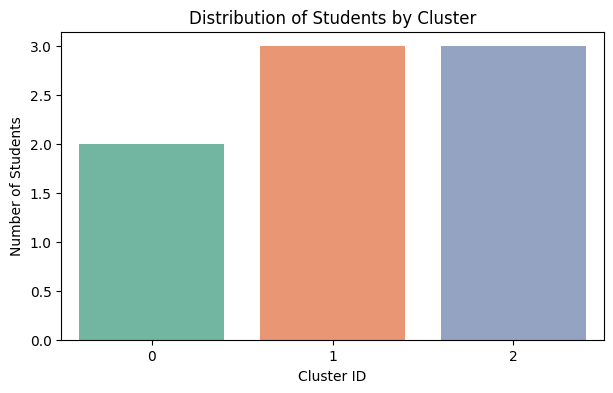

In [25]:
plt.figure(figsize=(7,4))
sns.countplot(x='ClusterID', data=df, palette='Set2')
plt.title('Distribution of Students by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Students')
plt.show()


/tmp/ipython-input-220514584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Recommendation', data=df, palette='Set3')


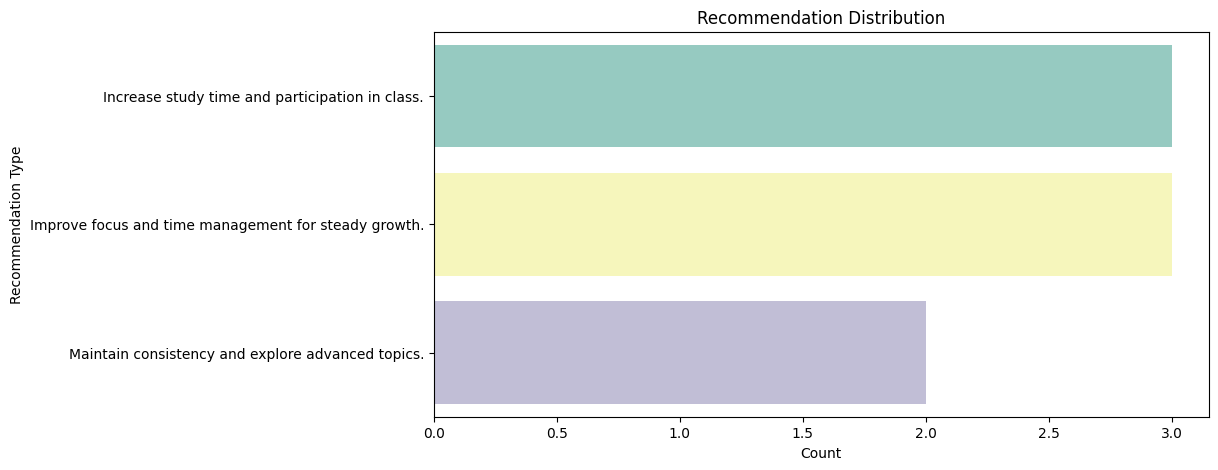

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(y='Recommendation', data=df, palette='Set3')
plt.title('Recommendation Distribution')
plt.xlabel('Count')
plt.ylabel('Recommendation Type')
plt.show()


In [27]:
df.to_csv('/content/student_recommendations.csv', index=False)
print("✅ Dataset with recommendations saved successfully!")


✅ Dataset with recommendations saved successfully!
